# Bank Marketing Classification Project

## Problem Statement
This project focuses on predicting whether a customer will subscribe to a bank term deposit (yes/no) based on data from direct marketing campaigns conducted via phone calls. The dataset contains 21 columns, including the target variable (y), which represents the subscription outcome.

## Objective
To build a classification model that identifies the most relevant features and predicts customer subscription, enabling better marketing strategies.

## Approach
* Data Exploration: Analyze dataset structure, handle missing values, and visualize patterns.
* Feature Engineering: Encode categorical variables, scale numerical data, and derive new features if needed.
* Data Splitting: Divide data into training, validation, and test sets.
* Model Selection: Test algorithms like Logistic Regression, Random Forest, and Gradient Boosting.
* Evaluation: Use metrics like accuracy, precision, recall, and AUC-ROC to assess model performance.

## Outcome
* A predictive model to classify customer subscription.
* Insights into key factors influencing subscriptions.
* Recommendations for optimizing future marketing campaigns.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_column', None)

In [7]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";", encoding="utf-8")

In [8]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

### Creating Binary Output Labels for Classification
Creating an Output_Label column to represent binary classes (0 for the negative class and 1 for the positive class) in the bank marketing dataset is a great step for classification tasks.

In [13]:
df['Output_Label'] = (df.y == 'yes').astype('int')

In [14]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Output_Label
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


## Prevalence Calculation in this Data

In [16]:
def calc_prevalence(y_actual):
    return sum(y_actual) / len(y_actual)

In [17]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['Output_Label'].values))

prevalence of the positive class: 0.113


Prevalence measures the proportion of the positive class (1) in a dataset. The code calculates this by dividing the total number of positive instances by the total number of records. For the bank marketing dataset, the positive class prevalence is 11.3%, indicating that only 11.3% of customers subscribed to the term deposit.

This highlights class imbalance, where the negative class (0) dominates the dataset. Understanding prevalence is essential for designing strategies to handle imbalanced data, ensuring the model effectively predicts both classes.

### Top ten features

In [20]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


### Last ten features

In [22]:
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Output_Label
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Exploring Unique Values in Dataset Columns

This code iterates through each column in a dataset to analyze the diversity of its values. If a column has fewer than 30 unique values, it prints the column name and its unique values. For columns with 30 or more unique values, it prints the column name and the count of unique values. This helps in distinguishing categorical variables from numerical or continuous ones, aiding in feature engineering and data preprocessing.

In [25]:
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

* We are discarding duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [27]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Output_Label
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Data Visualisation
* Numerical Features

In [29]:
cols_num = ['campaign', 'pdays' ,'previous', 'emp.var.rate' , 'age' ,'cons.price.idx' , 
            'cons.conf.idx'  , 'euribor3m' , 'nr.employed']

In [30]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,999,0,1.1,56,93.994,-36.4,4.857,5191.0
1,1,999,0,1.1,57,93.994,-36.4,4.857,5191.0
2,1,999,0,1.1,37,93.994,-36.4,4.857,5191.0
3,1,999,0,1.1,40,93.994,-36.4,4.857,5191.0
4,1,999,0,1.1,56,93.994,-36.4,4.857,5191.0


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/2196667183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df[cols_num], palette="viridis")  # Add a color palette


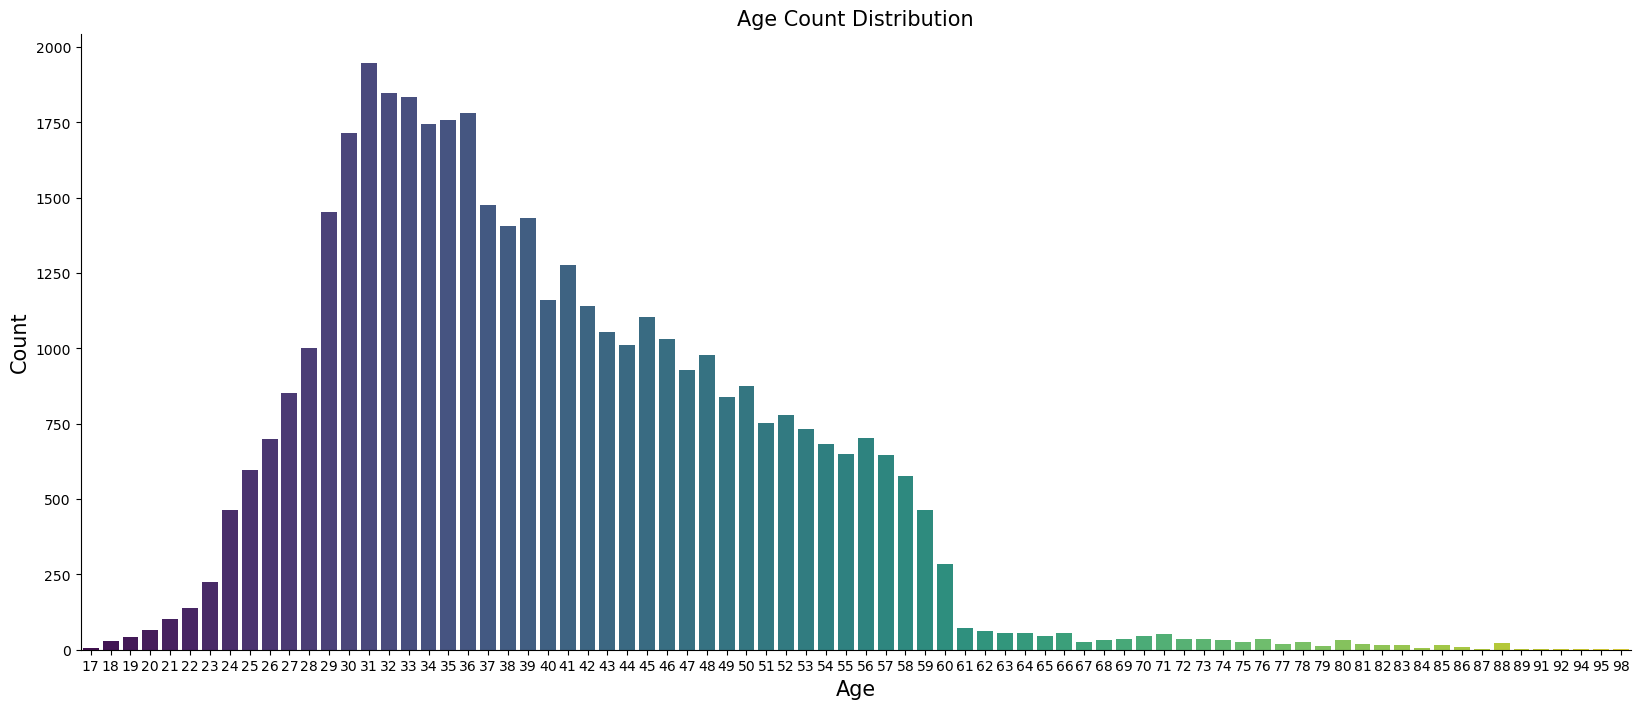

In [32]:
plt.figure(figsize=(20, 8))  # Set figure size
sns.countplot(x='age', data=df[cols_num], palette="viridis")  # Add a color palette
plt.xlabel('Age', fontsize=15)  # Set x-axis label
plt.ylabel('Count', fontsize=15)  # Set y-axis label
plt.title('Age Count Distribution', fontsize=15)  # Set plot title
sns.despine()  # Remove top and right spines
plt.show()  # Display the plot

## Visualization
* Boxplot: Visualize the distribution of age values, identify outliers, and observe the spread of the data.
* Histogram with KDE: Show the frequency of age values and understand the overall shape of the data distribution.
* Subplots: Enable side-by-side comparison of the boxplot and histogram for a comprehensive view of the data.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


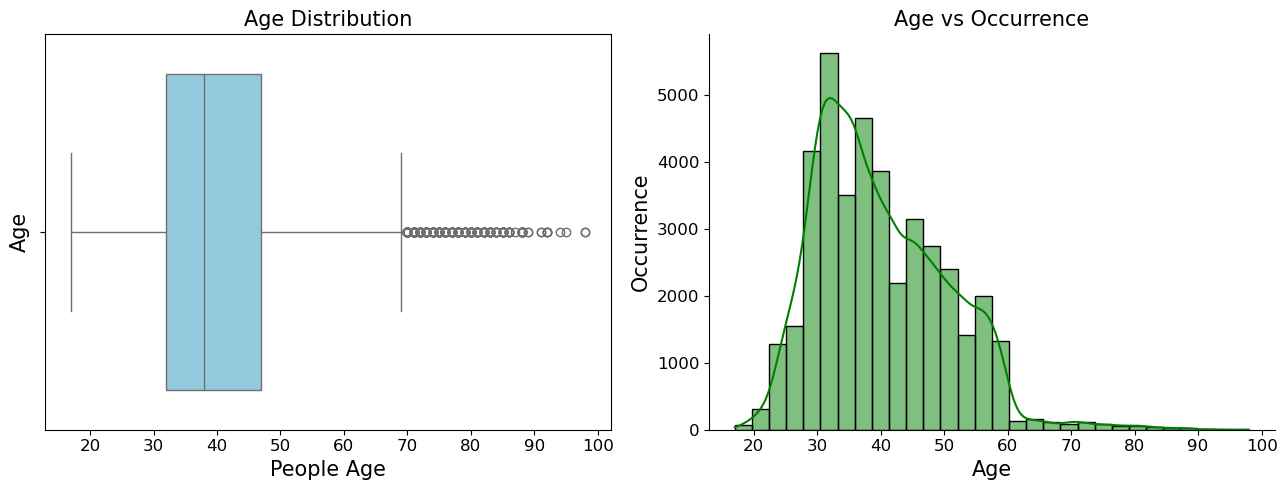

In [34]:
# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Boxplot for Age Distribution
sns.boxplot(x='age', data=df[cols_num], orient='v', ax=axes[0], color='skyblue')  # Set boxplot color
axes[0].set_title('Age Distribution', fontsize=15)
axes[0].set_xlabel('People Age', fontsize=15)
axes[0].set_ylabel('Age', fontsize=15)
axes[0].tick_params(labelsize=12)

# Histogram/Density Plot for Age
sns.histplot(df[cols_num]['age'], kde=True, ax=axes[1], color='green', bins=30)  # Combined histogram with KDE
axes[1].set_title('Age vs Occurrence', fontsize=15)
axes[1].set_xlabel('Age', fontsize=15)
axes[1].set_ylabel('Occurrence', fontsize=15)
axes[1].tick_params(labelsize=12)
sns.despine(ax=axes[1])  # Remove unnecessary spines

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

## Visualizing Contact Frequency in Previous Campaigns
* This plot illustrates the distribution of the previous variable, which represents the number of times clients were contacted before the current campaign. By analyzing this frequency, we can identify common patterns, optimize campaign strategies, and improve client targeting.

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/123546993.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


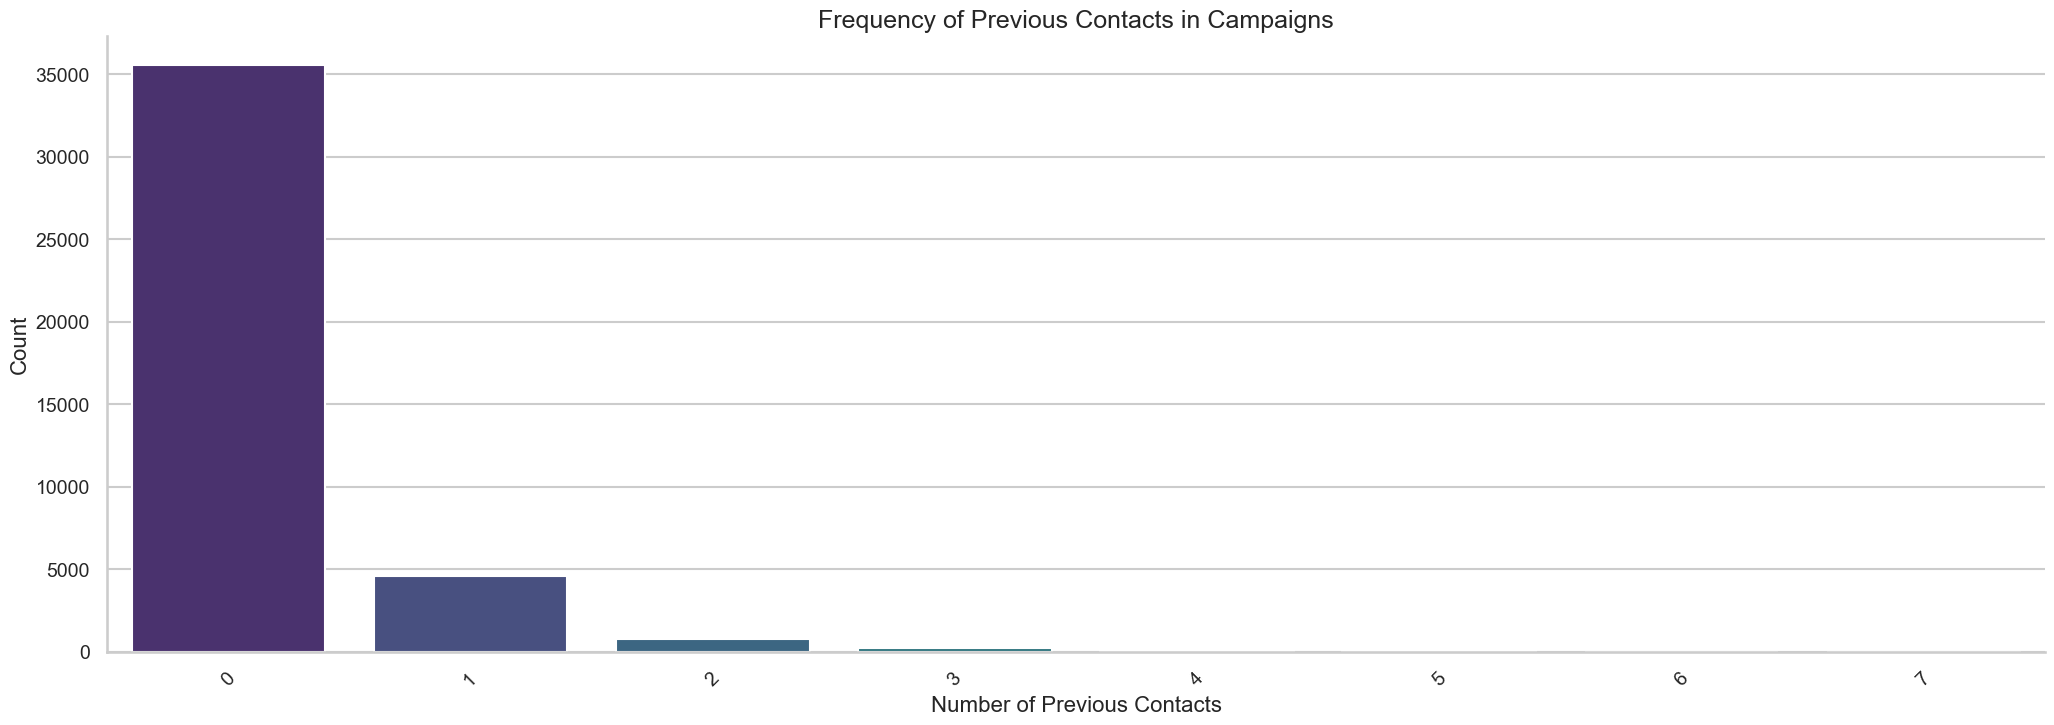

In [36]:
# Set plot style for better aesthetics
sns.set(style="whitegrid", context="talk")

# Create the figure and axis
plt.figure(figsize=(25, 8))

# Plot countplot with custom color palette
sns.countplot(
    x='previous', 
    data=df[cols_num], 
    palette="viridis"
)

# Add labels and title
plt.xlabel('Number of Previous Contacts', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Frequency of Previous Contacts in Campaigns', fontsize=18)

# Customize ticks
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Remove top and right spines
sns.despine()

# Display the plot
plt.show()
# previous: number of contacts performed before this campaign and for this client (numeric)

## Employment Variation Rate Distribution

* This plot visualizes the frequency of different values of emp.var.rate, which represents the quarterly employment variation rate. Understanding this distribution provides insights into economic conditions that might influence customer responses to the marketing campaign.

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/2914670883.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


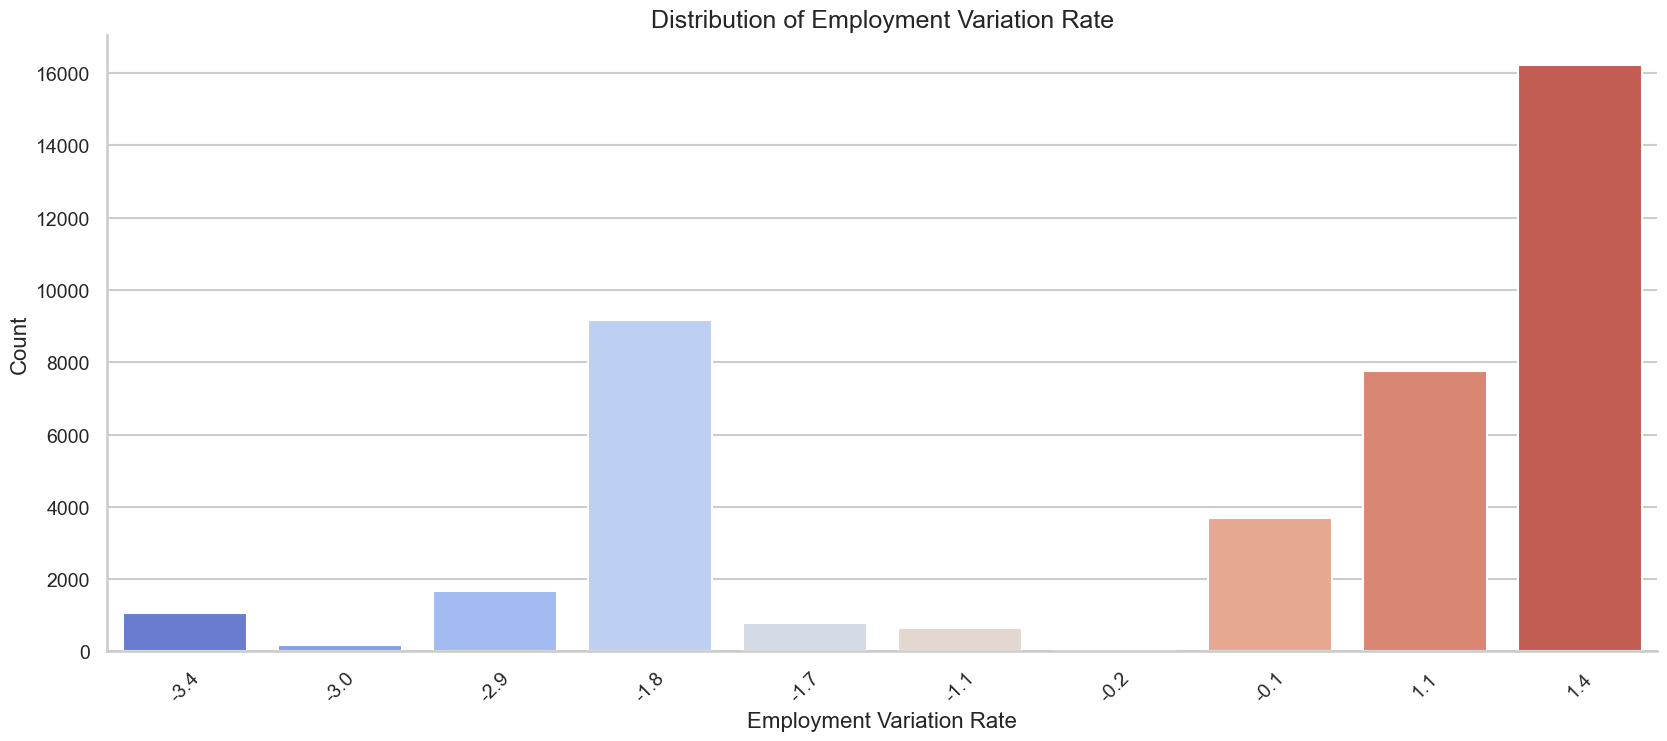

In [38]:
# Set plot style for better aesthetics
sns.set(style="whitegrid", context="talk")

# Create the figure and axis
plt.figure(figsize=(20, 8))

# Plot countplot with custom color palette
sns.countplot(
    x='emp.var.rate', 
    data=df[cols_num], 
    palette="coolwarm"
)

# Add labels and title
plt.xlabel('Employment Variation Rate', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Employment Variation Rate', fontsize=18)

# Customize ticks
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Remove top and right spines
sns.despine()

# Display the plot
plt.show()

In [39]:
df[cols_num].isnull().sum()

campaign          0
pdays             0
previous          0
emp.var.rate      0
age               0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

## Categorical Features

In [41]:
cols_cat = ['job', 'marital','education','default','housing','loan','contact',
'month','day_of_week','poutcome']

In [42]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

## One-Hot Encoding
One-hot encoding transforms categorical data into binary vectors, enabling machine learning models to process it effectively. Here's why it's essential:

### Model Compatibility

* Why: Models like regression and neural networks need numerical input.
* Solution: Converts categories into binary vectors.

### Avoids Ordinal Misinterpretation

* Why: Integer encoding may imply an incorrect order.
* Solution: Ensures categories are independent.

### Preserves Information

* Why: Other methods might misrepresent non-ordinal data.
* Solution: Creates distinct binary columns for each category.

### Reduces Bias

* Why: Numeric values could introduce bias.
* Solution: Treats all categories equally.

### Improves Feature Interpretation

* Why: Simplifies understanding category impact on the model.
* Solution: Separates categories into individual features.

### When to Use One-Hot Encoding
* For non-ordinal categorical data (e.g., colors, job roles).
* When categories are limited in number to avoid high dimensionality.

### Drawbacks and Alternatives
* High Dimensionality: Use target or binary encoding for high-cardinality features.
* Memory Usage: Store in sparse matrices for large datasets.
* One-hot encoding is versatile and effective but should be applied thoughtfully, based on the dataset and problem.

In [44]:
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


### Visualization of Education Level Distribution
This count plot displays the distribution of the education feature in the dataset. It shows how frequently each education level (such as "high school," "university degree," etc.) appears. The visualization helps identify the most common education levels among the dataset's subjects, providing insight into the demographic spread of educational qualifications.

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/1127098005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='viridis')


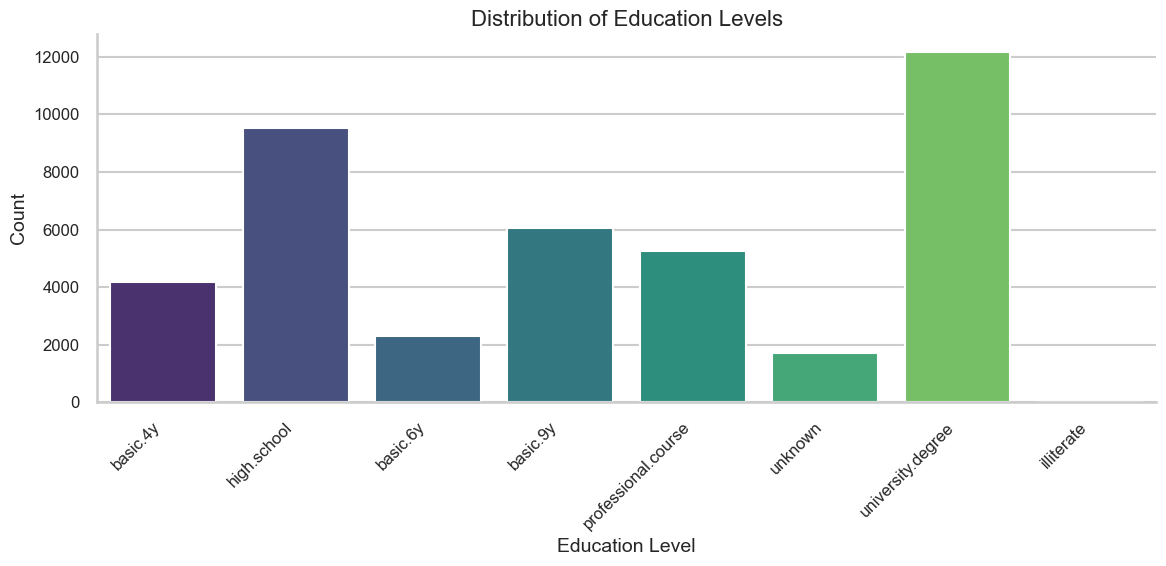

In [46]:
# Set figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the countplot for 'education' feature
sns.countplot(x='education', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Education Levels', fontsize=16)

# Adjust tick parameters for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines for better aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Visualization of Marital Status Distribution
This count plot illustrates the distribution of the marital feature in the dataset. It shows the frequency of different marital statuses (such as "married," "single," "divorced," etc.) among the individuals. This visualization helps in understanding the marital status breakdown, providing valuable demographic insights about the dataset

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/1687971450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df, palette='Set2')


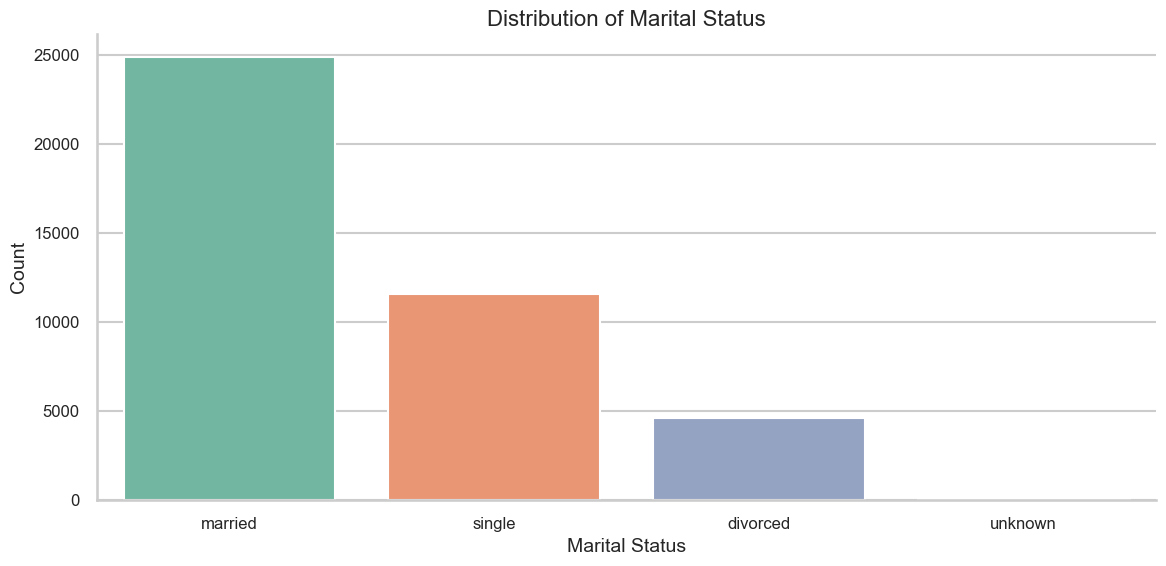

In [48]:
# Set figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the countplot for 'marital' feature
sns.countplot(x='marital', data=df, palette='Set2')

# Set labels and title
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Marital Status', fontsize=16)

# Adjust tick parameters for better readability
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines for better aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Visualization of Job Type Distribution
This count plot shows the distribution of various job types in the dataset, illustrating how many individuals belong to each job category. It provides valuable insights into the workforce composition and helps identify the most common job types within the data.

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/2825104317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df, palette='Set3')


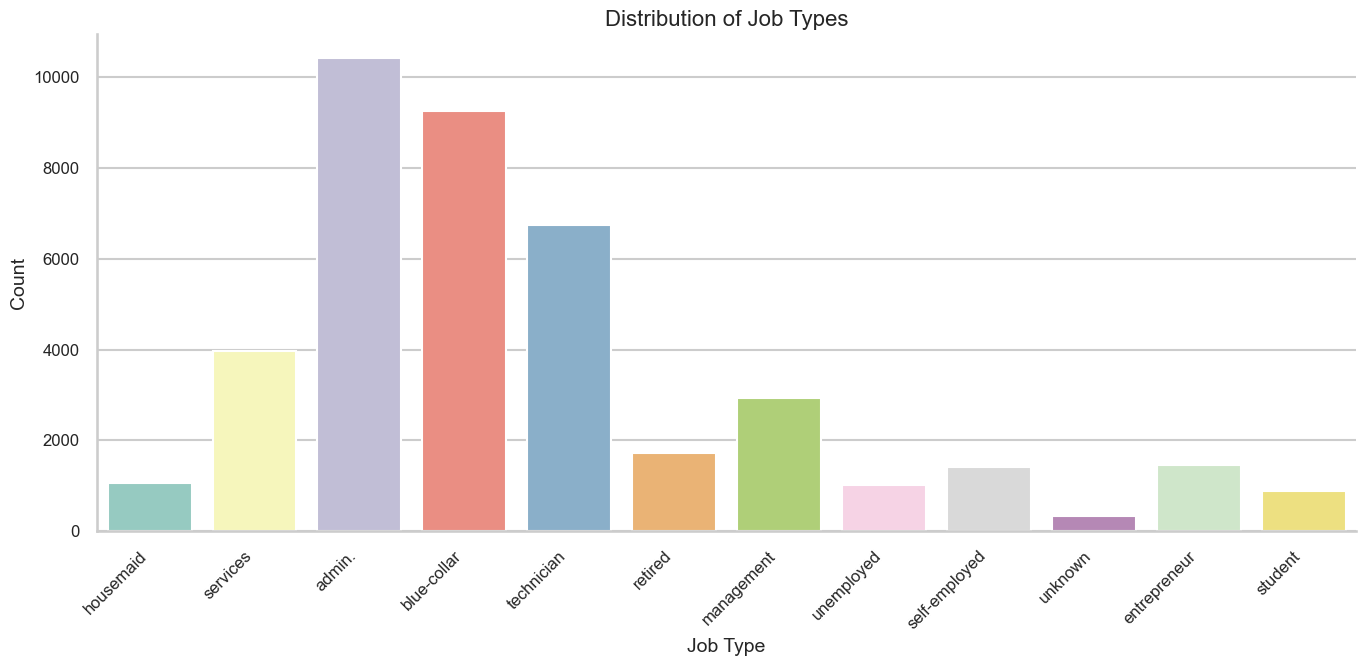

In [50]:
# Set figure size for the plot
plt.figure(figsize=(14, 7))

# Plot the countplot for 'job' feature
sns.countplot(x='job', data=df, palette='Set3')

# Set labels and title
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Job Types', fontsize=16)

# Adjust tick parameters for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines for better aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Visualization of Previous Outcome Distribution
This count plot illustrates the distribution of the poutcome feature, which represents the outcome of the previous marketing campaign (such as "failure," "success," or "nonexistent"). It provides insights into the effectiveness of past campaigns and helps identify how many clients experienced each outcome.

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/3042432628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='poutcome', data=df, palette='Set1')


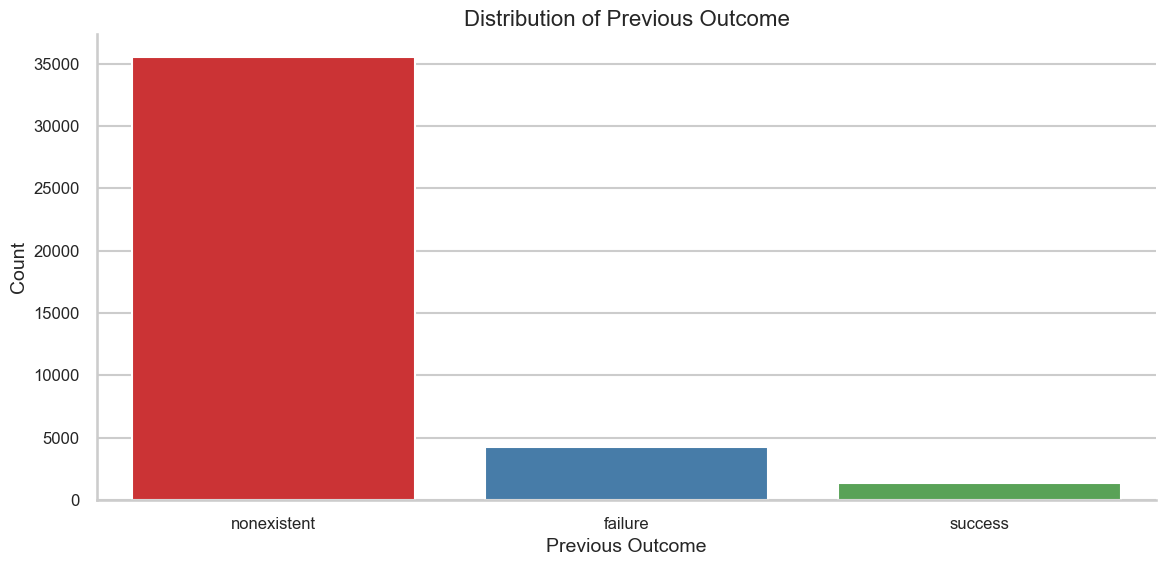

In [52]:
# Set figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the countplot for 'poutcome' feature
sns.countplot(x='poutcome', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Previous Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Previous Outcome', fontsize=16)

# Adjust tick parameters for better readability
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines for better aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Visualization of Loan and Default Status Distribution
This set of count plots visualizes the distribution of the default, housing, and loan features, which represent:

* default: Whether the client has credit in default.
* housing: Whether the client has a housing loan.
* loan: Whether the client has a personal loan.

These plots provide insights into the financial status of the clients, such as their credit history and loan status.

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/3820049059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='Set2')
/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/3820049059.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='housing', data=df, palette='Set2')
/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/3820049059.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan', data=df, palette='Set2')


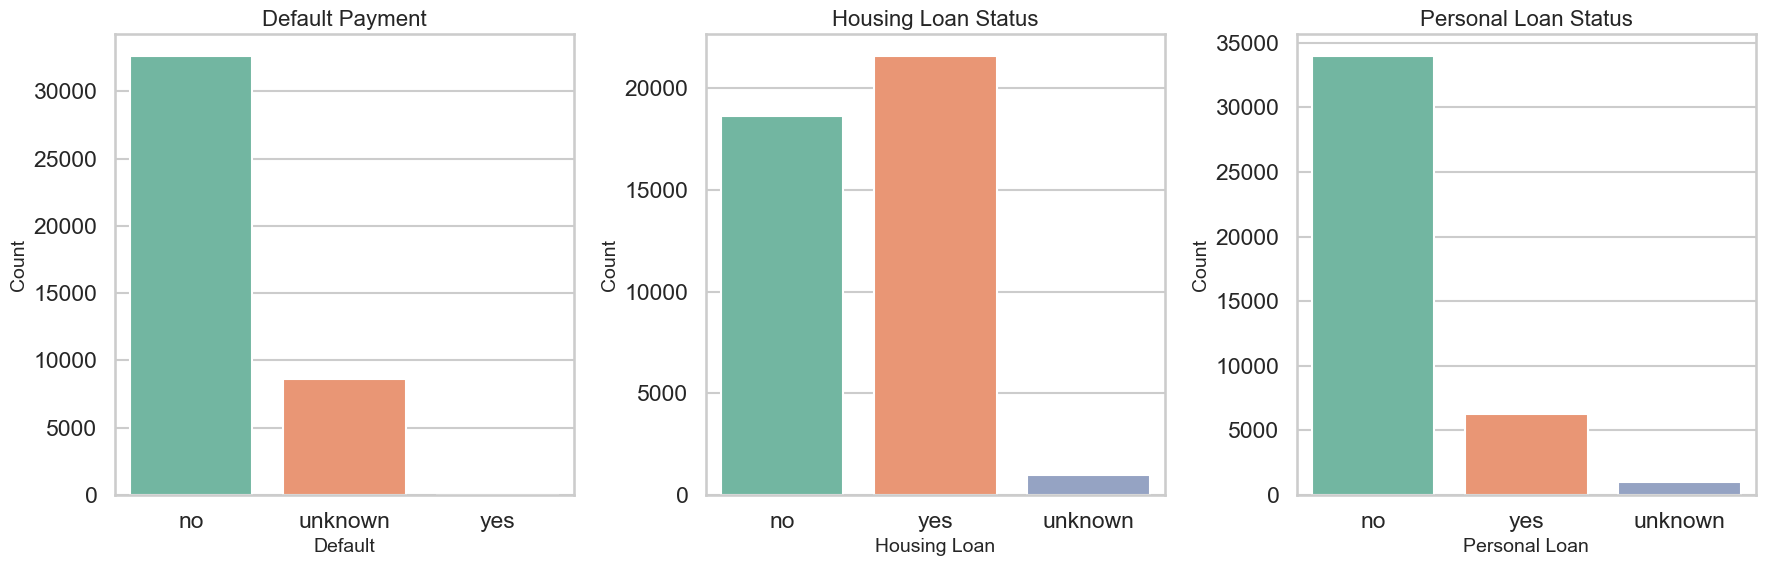

In [54]:
# Set figure size for the plot
plt.figure(figsize=(18, 6))

# Plot for 'default' feature
plt.subplot(1, 3, 1)
sns.countplot(x='default', data=df, palette='Set2')
plt.xlabel('Default', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Default Payment', fontsize=16)

# Plot for 'housing' feature
plt.subplot(1, 3, 2)
sns.countplot(x='housing', data=df, palette='Set2')
plt.xlabel('Housing Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Housing Loan Status', fontsize=16)

# Plot for 'loan' feature
plt.subplot(1, 3, 3)
sns.countplot(x='loan', data=df, palette='Set2')
plt.xlabel('Personal Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Personal Loan Status', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Visualization of Contact Communication, Month, and Day of Week Distribution
This set of count plots shows the distribution of the contact, month, and day_of_week features, which represent:

* contact: The type of communication used to contact clients (e.g., cellular, telephone).
* month: The month during which the marketing contact occurred.
* day_of_week: The day of the week on which the contact was made.

These plots provide insights into the seasonal and weekly trends of client interactions and the methods of communication used in the marketing campaigns.

/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/527726280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='contact', data=df, palette='Set1')
/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/527726280.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='Set1')
/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1182/527726280.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, palette='Set1')


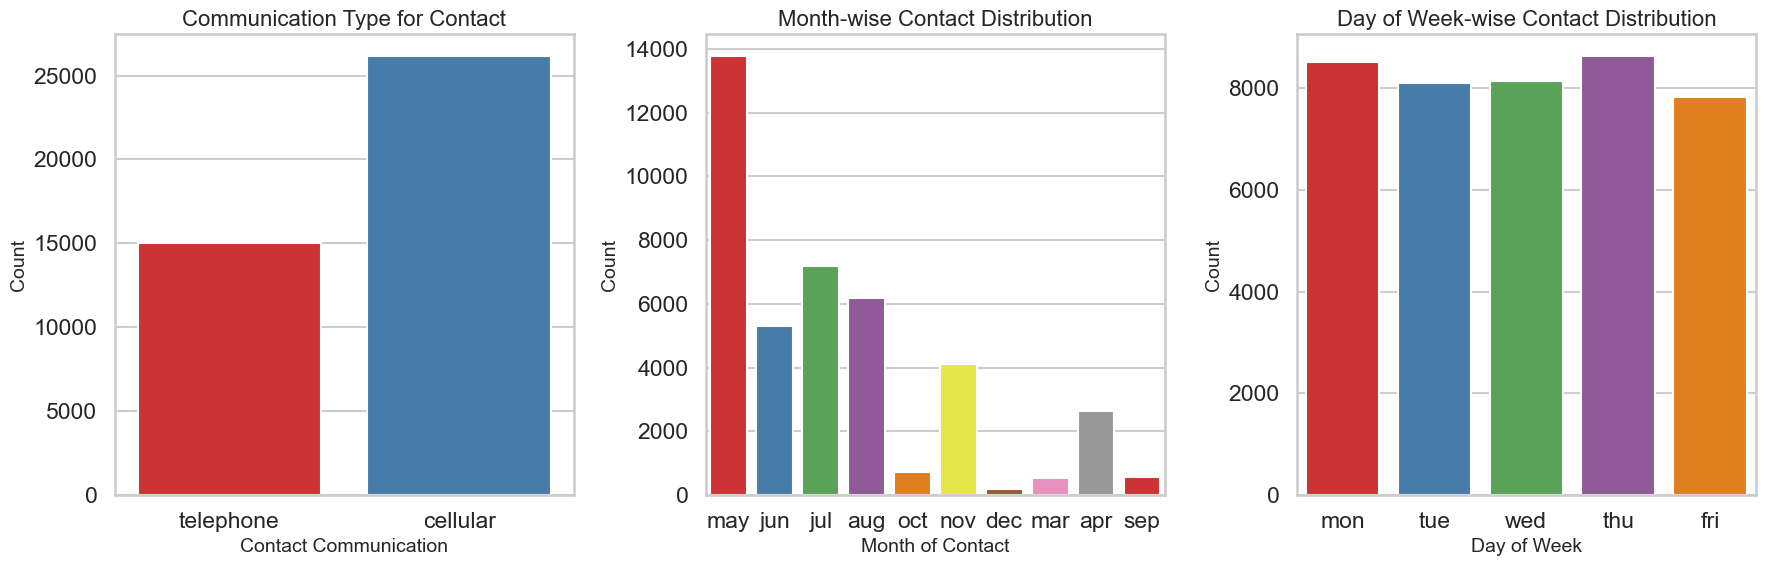

In [56]:
# Set figure size for the plot
plt.figure(figsize=(18, 6))

# Plot for 'contact' feature
plt.subplot(1, 3, 1)
sns.countplot(x='contact', data=df, palette='Set1')
plt.xlabel('Contact Communication', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Communication Type for Contact', fontsize=16)

# Plot for 'month' feature
plt.subplot(1, 3, 2)
sns.countplot(x='month', data=df, palette='Set1')
plt.xlabel('Month of Contact', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Month-wise Contact Distribution', fontsize=16)

# Plot for 'day_of_week' feature
plt.subplot(1, 3, 3)
sns.countplot(x='day_of_week', data=df, palette='Set1')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Day of Week-wise Contact Distribution', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Integrating One-Hot Encoded Features into the Dataset

* Add new one-hot encoded categorical features to the existing dataset.
* View a preview of the new features to ensure they’ve been correctly added to the DataFrame.
* cols_all_cat allows you to track the one-hot encoded columns specifically and inspect them.

In [58]:
# Concatenate the one-hot encoded features with the original dataset
df = pd.concat([df, cols_new_cat], axis=1)

# Store the names of the new one-hot encoded columns in a list
cols_all_cat = list(cols_new_cat.columns)

# Display the first 5 rows of the newly added one-hot encoded columns
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [59]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 62
Numerical Features: 9
Categorical Features: 53


In [60]:
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

campaign                 0
month_dec                0
default_no               0
default_unknown          0
default_yes              0
                        ..
education_basic.4y       0
education_basic.6y       0
education_basic.9y       0
education_high.school    0
poutcome_success         0
Length: 62, dtype: int64

In [61]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['Output_Label']]

In [62]:
df_data

,campaign,pdays,previous,emp.var.rate,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Output_Label
0,1,999,0,1.1,56,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
1,1,999,0,1.1,57,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
2,1,999,0,1.1,37,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
3,1,999,0,1.1,40,93.994,-36.4,4.857,5191.0,True,...,False,False,True,False,False,False,False,True,False,0
4,1,999,0,1.1,56,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,999,0,-1.1,73,94.767,-50.8,1.028,4963.6,False,...,False,True,False,False,False,False,False,True,False,1
41184,1,999,0,-1.1,46,94.767,-50.8,1.028,4963.6,False,...,False,True,False,False,False,False,False,True,False,0
41185,2,999,0,-1.1,56,94.767,-50.8,1.028,4963.6,False,...,False,True,False,False,False,False,False,True,False,0
41186,1,999,0,-1.1,44,94.767,-50.8,1.028,4963.6,False,...,False,True,False,False,False,False,False,True,False,1


In [63]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'age',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [64]:
len(cols_input)

62

In [65]:
df_data.head(6)

,campaign,pdays,previous,emp.var.rate,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Output_Label
0,1,999,0,1.1,56,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
1,1,999,0,1.1,57,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
2,1,999,0,1.1,37,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
3,1,999,0,1.1,40,93.994,-36.4,4.857,5191.0,True,...,False,False,True,False,False,False,False,True,False,0
4,1,999,0,1.1,56,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0
5,1,999,0,1.1,45,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,True,False,0


## Creating Training, Validation, and Test Samples

To develop a robust machine learning model, the dataset needs to be split into training, validation, and test sets. This ensures the model is trained effectively, fine-tuned, and evaluated accurately without overfitting or underfitting. The training set is used to fit the model, the validation set helps optimize hyperparameters, and the test set evaluates final model performance.

In [68]:
from sklearn.model_selection import train_test_split

# Shuffle and reset index
df_data = df_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training (70%) and remaining data (30%)
df_train_all, df_valid_test = train_test_split(df_data, test_size=0.3, random_state=42, stratify=df_data['Output_Label'])

# Split the remaining 30% into validation (15%) and test (15%)
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5, random_state=42, stratify=df_valid_test['Output_Label'])

# Print dataset sizes
print(f"Training Set: {df_train_all.shape}")
print(f"Validation Set: {df_valid.shape}")
print(f"Test Set: {df_test.shape}")

# Calculate prevalence in each split
def calc_prevalence(y_actual):
    return sum(y_actual) / len(y_actual)

print(f"Training Prevalence (n = {len(df_train_all)}): {calc_prevalence(df_train_all['Output_Label'].values):.3f}")
print(f"Validation Prevalence (n = {len(df_valid)}): {calc_prevalence(df_valid['Output_Label'].values):.3f}")
print(f"Test Prevalence (n = {len(df_test)}): {calc_prevalence(df_test['Output_Label'].values):.3f}")


Training Set: (28831, 63)
Validation Set: (6178, 63)
Test Set: (6179, 63)
Training Prevalence (n = 28831): 0.113
Validation Prevalence (n = 6178): 0.113
Test Prevalence (n = 6179): 0.113


### Imbalanced Datasets:
If the positive and negative classes are significantly imbalanced (e.g., 11.3% prevalence of the positive class in your case), most machine learning models tend to favor the majority class. This can lead to:

* Low recall for the minority class.
* Poor overall performance on minority class predictions.

### Improves Model Training:
Balancing the data ensures the model gets an equal opportunity to learn patterns from both classes, which can improve the model's ability to predict the minority class.

### Class Weights:
Instead of balancing the dataset manually, we can use the class_weight parameter in some algorithms like Logistic Regression, Random Forest, or SVM. This method adjusts the algorithm to give more importance to the minority class.

### Configure Class Weights
Class weights tell the model to assign more importance to the minority class during training.

In [81]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Convert classes to a NumPy array
classes = np.array([0, 1])

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=classes, y=df_train_all['Output_Label'])
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class Weights: {class_weights_dict}")


Class Weights: {0: 0.5634796544580385, 1: 4.438269704433497}


The output indicates the calculated class weights for each class in your dataset:

* <b>Class 0 Weight (0)</b>: 0.5635
This means that samples from class 0 (negative cases) are assigned less weight since they are more frequent in the dataset.

* <b> Class 1 Weight (1)</b>: 4.4383
This shows that samples from class 1 (positive cases) are assigned a higher weight to compensate for their minority presence.

### Why Use Class Weights?
Class weights are applied to address the imbalance in the dataset, ensuring the model doesn't favor the majority class disproportionately during training. The weights are inversely proportional to the frequency of each class.

### Split Features and Target
Separate your features (independent variables) and the target variable (Output_Label).

### Next Steps
Integrate Class Weights in Your Model Use the computed class_weights_dict in your model training process. For example, with a decision tree or logistic regression in scikit-learn:

In [94]:
X = df_train_all.drop(columns=['Output_Label'])  # Features
y = df_train_all['Output_Label']                # Target


In [102]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (70% train, 30% test/validation)
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split the test data into validation and test sets (15% each)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)


In [107]:
# Train the model with class weights
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
model.fit(X_train_all, y_train_all)


RandomForestClassifier(class_weight={0: 0.5634796544580385,
                                     1: 4.438269704433497},
                       random_state=42)

### Model Training with Class Weights
Now that the class weights are defined and the data is properly split, you can proceed to train your machine learning model.

<b> Here’s how to do it step by step:

* Choose a Model: For simplicity, let's use a RandomForestClassifier, but you can choose any other model (e.g., Logistic Regression, SVM, etc.) that supports class_weight.

* Fit the Model with Class Weights: Use the class_weight parameter that you've already calculated.

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model with class weights
model = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)

# Train the model
model.fit(X_train_all, y_train_all)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model's performance
print("Classification Report for Validation Data:")
print(classification_report(y_valid, y_pred))


Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3838
           1       0.51      0.26      0.34       487

    accuracy                           0.89      4325
   macro avg       0.71      0.61      0.64      4325
weighted avg       0.87      0.89      0.87      4325



### Model Evaluation
Now that you have trained the model, it’s important to evaluate its performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

We can use the classification_report and confusion_matrix to see how well the model is performing.

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_valid, y_pred):.3f}")

# Print classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_valid, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3838
           1       0.51      0.26      0.34       487

    accuracy                           0.89      4325
   macro avg       0.71      0.61      0.64      4325
weighted avg       0.87      0.89      0.87      4325

Confusion Matrix:
[[3716  122]
 [ 362  125]]


### Fine-tuning
* Hyperparameter Tuning: If the model isn’t performing well, we can try hyperparameter tuning using GridSearchCV or RandomizedSearchCV to find the best hyperparameters.
* Cross-Validation: We may also use cross-validation to ensure the model generalizes well.

In [119]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to tune the RandomForest model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(class_weight=class_weights_dict, random_state=42),
                           param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_all, y_train_all)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


* max_depth: None - This means the trees in your forest are allowed to grow without any restrictions on their depth, which means they can grow as deep as needed based on the data.
* min_samples_split: 2 - This is the minimum number of samples required to split an internal node. A value of 2 means that even a small sample size can trigger a split.
* n_estimators: 100 - The model uses 100 trees in the forest for training.
  
These parameters were selected based on cross-validation, ensuring that they provide the best performance given the dataset.

In [122]:
# Re-train the model using the best parameters found by GridSearchCV
best_model = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100, class_weight=class_weights_dict, random_state=42)

# Train the model
best_model.fit(X_train_all, y_train_all)

# Make predictions on the validation set
y_pred_valid = best_model.predict(X_valid)

# Evaluate the model's performance on validation data
print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate the model's performance on test data
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3838
           1       0.51      0.26      0.34       487

    accuracy                           0.89      4325
   macro avg       0.71      0.61      0.64      4325
weighted avg       0.87      0.89      0.87      4325

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3838
           1       0.59      0.30      0.40       487

    accuracy                           0.90      4325
   macro avg       0.75      0.64      0.67      4325
weighted avg       0.88      0.90      0.88      4325



### Key Insights:
* Precision:

For class 0 (the negative class), precision is 0.91 (validation) and 0.92 (test), meaning the model correctly predicts 91% (or 92%) of all negative class predictions.
For class 1 (the positive class), precision is 0.51 (validation) and 0.59 (test), meaning that the model is less reliable in predicting the positive class. A precision of 0.51 means 51% of the predicted positives are actual positives, which is moderate.

* Recall:

For class 0, recall is 0.97 (validation) and 0.97 (test), meaning the model is highly effective at identifying most of the negative class.
For class 1, recall is 0.26 (validation) and 0.30 (test), which is quite low, indicating that the model misses a large number of positive cases.

* F1-Score:

The F1-score balances precision and recall, and for class 0, it’s high (0.94 for both validation and test). For class 1, the F1-score is much lower (0.34 for validation, 0.40 for test), reflecting the imbalance in precision and recall.

* Accuracy:

The model achieves 89% accuracy on the validation set and 90% accuracy on the test set. However, accuracy can be misleading in the case of class imbalance, which is evident here.

* Macro Average:

This gives an average of the precision, recall, and F1-score across both classes, without considering the class imbalance. The macro average F1-score is 0.64 on the validation set and 0.67 on the test set, indicating that the model performs better on the test set but still struggles with the positive class.

* Weighted Average:

The weighted average accounts for the imbalance by giving more weight to the majority class (class 0). The weighted F1-score is 0.87 for validation and 0.88 for the test set, indicating good overall performance despite the class imbalance.

## Model Selection

<b>To evaluate different models on the dataset, we'll apply the following machine learning algorithms:

* K-Nearest Neighbors (KNN)
* Logistic Regression
* Naive Bayes
* Decision Tree Classifier
* Gradient Boosting Classifier
  
For each model, we will compute the following evaluation metrics:

* AUC (Area Under the Curve)
* Accuracy
* Recall
* Precision
* Specificity
* Prevalence
* F1-Score

### Import Necessary Libraries

In [134]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Define a Function to Calculate Specificity
To calculate specificity, use the confusion matrix, as we did previously:

In [137]:
def specificity(confusion_matrix):
    return confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])


### Train and Evaluate Models
Now, let’s apply each model one by one, calculate the required metrics (AUC, accuracy, recall, precision, specificity, prevalence, and F1 score), and print the results.

### KNN (K-Nearest Neighbors)

In [189]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_all, y_train_all)

# Predictions
y_train_pred = knn.predict(X_train_all)
y_valid_pred = knn.predict(X_valid)

# Calculate Metrics for Training
knn_train_auc = roc_auc_score(y_train_all, y_train_pred)
knn_train_accuracy = accuracy_score(y_train_all, y_train_pred)
knn_train_recall = recall_score(y_train_all, y_train_pred)
knn_train_precision = precision_score(y_train_all, y_train_pred)
knn_train_confusion = confusion_matrix(y_train_all, y_train_pred)
knn_train_specificity = specificity(train_confusion)
knn_train_f1 = f1_score(y_train_all, y_train_pred)

# Calculate Metrics for Validation
knn_valid_auc = roc_auc_score(y_valid, y_valid_pred)
knn_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
knn_valid_recall = recall_score(y_valid, y_valid_pred)
knn_valid_precision = precision_score(y_valid, y_valid_pred)
knn_valid_confusion = confusion_matrix(y_valid, y_valid_pred)
knn_valid_specificity = specificity(valid_confusion)
knn_valid_f1 = f1_score(y_valid, y_valid_pred)

# Print Results
print("KNN Model Evaluation")
print(f"Training AUC: {train_auc:.3f}, Accuracy: {train_accuracy:.3f}, Recall: {train_recall:.3f}, Precision: {train_precision:.3f}, Specificity: {train_specificity:.3f}, F1: {train_f1:.3f}")
print(f"Validation AUC: {valid_auc:.3f}, Accuracy: {valid_accuracy:.3f}, Recall: {valid_recall:.3f}, Precision: {valid_precision:.3f}, Specificity: {valid_specificity:.3f}, F1: {valid_f1:.3f}")


KNN Model Evaluation
Training AUC: 0.631, Accuracy: 0.908, Recall: 0.274, Precision: 0.750, Specificity: 0.988, F1: 0.402
Validation AUC: 0.598, Accuracy: 0.895, Recall: 0.214, Precision: 0.598, Specificity: 0.982, F1: 0.315


### Logistic Regression

In [175]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_all, y_train_all)

# Predictions
y_train_pred = log_reg.predict(X_train_all)
y_valid_pred = log_reg.predict(X_valid)

# Calculate Metrics for Training
lr_train_auc = roc_auc_score(y_train_all, y_train_pred)
lr_train_accuracy = accuracy_score(y_train_all, y_train_pred)
lr_train_recall = recall_score(y_train_all, y_train_pred)
lr_train_precision = precision_score(y_train_all, y_train_pred)
lr_train_confusion = confusion_matrix(y_train_all, y_train_pred)
lr_train_specificity = specificity(train_confusion)
lr_train_f1 = f1_score(y_train_all, y_train_pred)

# Calculate Metrics for Validation
lr_valid_auc = roc_auc_score(y_valid, y_valid_pred)
lr_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
lr_valid_recall = recall_score(y_valid, y_valid_pred)
lr_valid_precision = precision_score(y_valid, y_valid_pred)
lr_valid_confusion = confusion_matrix(y_valid, y_valid_pred)
lr_valid_specificity = specificity(valid_confusion)
lr_valid_f1 = f1_score(y_valid, y_valid_pred)

# Print Results
print("Logistic Regression Model Evaluation")
print(f"Training AUC: {train_auc:.3f}, Accuracy: {train_accuracy:.3f}, Recall: {train_recall:.3f}, Precision: {train_precision:.3f}, Specificity: {train_specificity:.3f}, F1: {train_f1:.3f}")
print(f"Validation AUC: {valid_auc:.3f}, Accuracy: {valid_accuracy:.3f}, Recall: {valid_recall:.3f}, Precision: {valid_precision:.3f}, Specificity: {valid_specificity:.3f}, F1: {valid_f1:.3f}")


Logistic Regression Model Evaluation
Training AUC: 0.631, Accuracy: 0.908, Recall: 0.274, Precision: 0.750, Specificity: 0.988, F1: 0.402
Validation AUC: 0.598, Accuracy: 0.895, Recall: 0.214, Precision: 0.598, Specificity: 0.982, F1: 0.315


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes

In [177]:
# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_all, y_train_all)

# Predictions
y_train_pred = nb.predict(X_train_all)
y_valid_pred = nb.predict(X_valid)

# Calculate Metrics for Training
nb_train_auc = roc_auc_score(y_train_all, y_train_pred)
nb_train_accuracy = accuracy_score(y_train_all, y_train_pred)
nb_train_recall = recall_score(y_train_all, y_train_pred)
nb_train_precision = precision_score(y_train_all, y_train_pred)
nb_train_confusion = confusion_matrix(y_train_all, y_train_pred)
nb_train_specificity = specificity(train_confusion)
nb_train_f1 = f1_score(y_train_all, y_train_pred)

# Calculate Metrics for Validation
nb_valid_auc = roc_auc_score(y_valid, y_valid_pred)
nb_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
nb_valid_recall = recall_score(y_valid, y_valid_pred)
nb_valid_precision = precision_score(y_valid, y_valid_pred)
nb_valid_confusion = confusion_matrix(y_valid, y_valid_pred)
nb_valid_specificity = specificity(valid_confusion)
nb_valid_f1 = f1_score(y_valid, y_valid_pred)

# Print Results
print("Naive Bayes Model Evaluation")
print(f"Training AUC: {train_auc:.3f}, Accuracy: {train_accuracy:.3f}, Recall: {train_recall:.3f}, Precision: {train_precision:.3f}, Specificity: {train_specificity:.3f}, F1: {train_f1:.3f}")
print(f"Validation AUC: {valid_auc:.3f}, Accuracy: {valid_accuracy:.3f}, Recall: {valid_recall:.3f}, Precision: {valid_precision:.3f}, Specificity: {valid_specificity:.3f}, F1: {valid_f1:.3f}")


Naive Bayes Model Evaluation
Training AUC: 0.631, Accuracy: 0.908, Recall: 0.274, Precision: 0.750, Specificity: 0.988, F1: 0.402
Validation AUC: 0.598, Accuracy: 0.895, Recall: 0.214, Precision: 0.598, Specificity: 0.982, F1: 0.315


### Decision Tree

In [179]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_all, y_train_all)

# Predictions
y_train_pred = dt.predict(X_train_all)
y_valid_pred = dt.predict(X_valid)

# Calculate Metrics for Training
tree_train_auc = roc_auc_score(y_train_all, y_train_pred)
tree_train_accuracy = accuracy_score(y_train_all, y_train_pred)
tree_train_recall = recall_score(y_train_all, y_train_pred)
tree_train_precision = precision_score(y_train_all, y_train_pred)
tree_train_confusion = confusion_matrix(y_train_all, y_train_pred)
tree_train_specificity = specificity(train_confusion)
tree_train_f1 = f1_score(y_train_all, y_train_pred)

# Calculate Metrics for Validation
tree_valid_auc = roc_auc_score(y_valid, y_valid_pred)
tree_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
tree_valid_recall = recall_score(y_valid, y_valid_pred)
tree_valid_precision = precision_score(y_valid, y_valid_pred)
tree_valid_confusion = confusion_matrix(y_valid, y_valid_pred)
tree_valid_specificity = specificity(valid_confusion)
tree_valid_f1 = f1_score(y_valid, y_valid_pred)

# Print Results
print("Decision Tree Model Evaluation")
print(f"Training AUC: {train_auc:.3f}, Accuracy: {train_accuracy:.3f}, Recall: {train_recall:.3f}, Precision: {train_precision:.3f}, Specificity: {train_specificity:.3f}, F1: {train_f1:.3f}")
print(f"Validation AUC: {valid_auc:.3f}, Accuracy: {valid_accuracy:.3f}, Recall: {valid_recall:.3f}, Precision: {valid_precision:.3f}, Specificity: {valid_specificity:.3f}, F1: {valid_f1:.3f}")


Decision Tree Model Evaluation
Training AUC: 0.631, Accuracy: 0.908, Recall: 0.274, Precision: 0.750, Specificity: 0.988, F1: 0.402
Validation AUC: 0.598, Accuracy: 0.895, Recall: 0.214, Precision: 0.598, Specificity: 0.982, F1: 0.315


### Gradient Boosting Classifier

In [181]:
# Gradient Boosting Model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_all, y_train_all)

# Predictions
y_train_pred = gbc.predict(X_train_all)
y_valid_pred = gbc.predict(X_valid)

# Calculate Metrics for Training
gbc_train_auc = roc_auc_score(y_train_all, y_train_pred)
gbc_train_accuracy = accuracy_score(y_train_all, y_train_pred)
gbc_train_recall = recall_score(y_train_all, y_train_pred)
gbc_train_precision = precision_score(y_train_all, y_train_pred)
gbc_train_confusion = confusion_matrix(y_train_all, y_train_pred)
gbc_train_specificity = specificity(train_confusion)
gbc_train_f1 = f1_score(y_train_all, y_train_pred)

# Calculate Metrics for Validation
gbc_valid_auc = roc_auc_score(y_valid, y_valid_pred)
gbc_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
gbc_valid_recall = recall_score(y_valid, y_valid_pred)
gbc_valid_precision = precision_score(y_valid, y_valid_pred)
gbc_valid_confusion = confusion_matrix(y_valid, y_valid_pred)
gbc_valid_specificity = specificity(valid_confusion)
gbc_valid_f1 = f1_score(y_valid, y_valid_pred)

# Print Results
print("Gradient Boosting Model Evaluation")
print(f"Training AUC: {train_auc:.3f}, Accuracy: {train_accuracy:.3f}, Recall: {train_recall:.3f}, Precision: {train_precision:.3f}, Specificity: {train_specificity:.3f}, F1: {train_f1:.3f}")
print(f"Validation AUC: {valid_auc:.3f}, Accuracy: {valid_accuracy:.3f}, Recall: {valid_recall:.3f}, Precision: {valid_precision:.3f}, Specificity: {valid_specificity:.3f}, F1: {valid_f1:.3f}")


Gradient Boosting Model Evaluation
Training AUC: 0.631, Accuracy: 0.908, Recall: 0.274, Precision: 0.750, Specificity: 0.988, F1: 0.402
Validation AUC: 0.598, Accuracy: 0.895, Recall: 0.214, Precision: 0.598, Specificity: 0.982, F1: 0.315


In [191]:
import pandas as pd

# Store the metrics in a DataFrame
df_results = pd.DataFrame({
    'classifier': ['KNN', 'KNN', 'LR', 'LR', 'NB', 'NB', 'DT', 'DT', 'GB', 'GB'],
    'data_set': ['train', 'valid', 'train', 'valid', 'train', 'valid', 'train', 'valid', 'train', 'valid'],
    'auc': [knn_train_auc, knn_valid_auc, lr_train_auc, lr_valid_auc, nb_train_auc, nb_valid_auc,
            tree_train_auc, tree_valid_auc, gbc_train_auc, gbc_valid_auc],
    'accuracy': [knn_train_accuracy, knn_valid_accuracy, lr_train_accuracy, lr_valid_accuracy,
                 nb_train_accuracy, nb_valid_accuracy, tree_train_accuracy, tree_valid_accuracy,
                 gbc_train_accuracy, gbc_valid_accuracy],
    'recall': [knn_train_recall, knn_valid_recall, lr_train_recall, lr_valid_recall, nb_train_recall,
               nb_valid_recall, tree_train_recall, tree_valid_recall, gbc_train_recall, gbc_valid_recall],
    'precision': [knn_train_precision, knn_valid_precision, lr_train_precision, lr_valid_precision, nb_train_precision,
                 nb_valid_precision, tree_train_precision, tree_valid_precision, gbc_train_precision, gbc_valid_precision],
    'specificity': [knn_train_specificity, knn_valid_specificity, lr_train_specificity, lr_valid_specificity, nb_train_specificity,
                    nb_valid_specificity, tree_train_specificity, tree_valid_specificity, gbc_train_specificity, gbc_valid_specificity],
    'f1': [knn_train_f1, knn_valid_f1, lr_train_f1, lr_valid_f1, nb_train_f1, nb_valid_f1,
           tree_train_f1, tree_valid_f1, gbc_train_f1, gbc_valid_f1]
})


### Plotting AUC for Training vs Validation

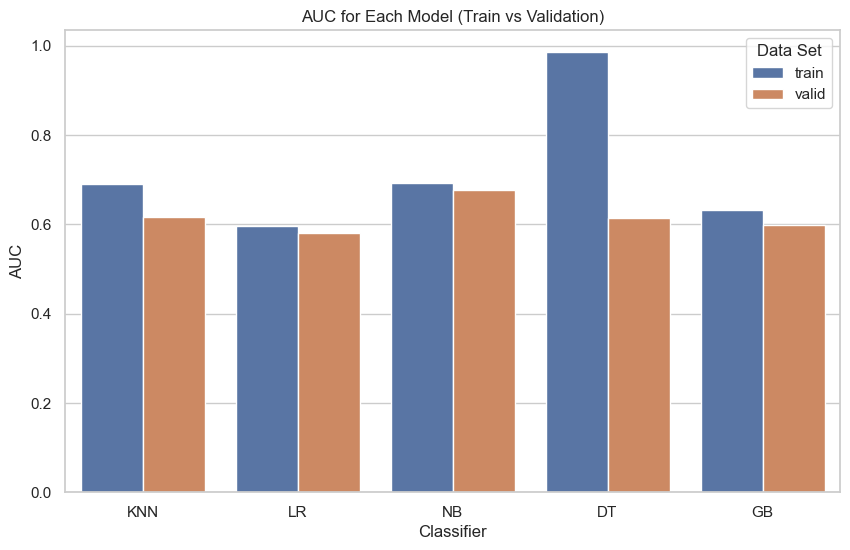

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the seaborn style
sns.set(style="whitegrid")

# Plot AUC for each model and dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
plt.title('AUC for Each Model (Train vs Validation)')
plt.xlabel('Classifier')
plt.ylabel('AUC')
plt.legend(title="Data Set")
plt.show()


### Plotting F1 Score for Training vs Validation

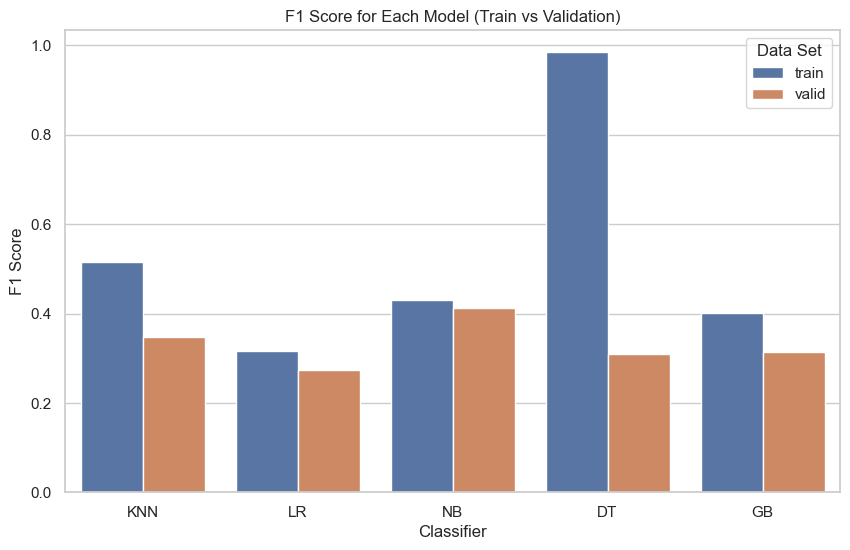

In [197]:
# Plot F1 Score for each model and dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="classifier", y="f1", hue="data_set", data=df_results)
plt.title('F1 Score for Each Model (Train vs Validation)')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.legend(title="Data Set")
plt.show()

### Plotting Recall for Training vs Validation

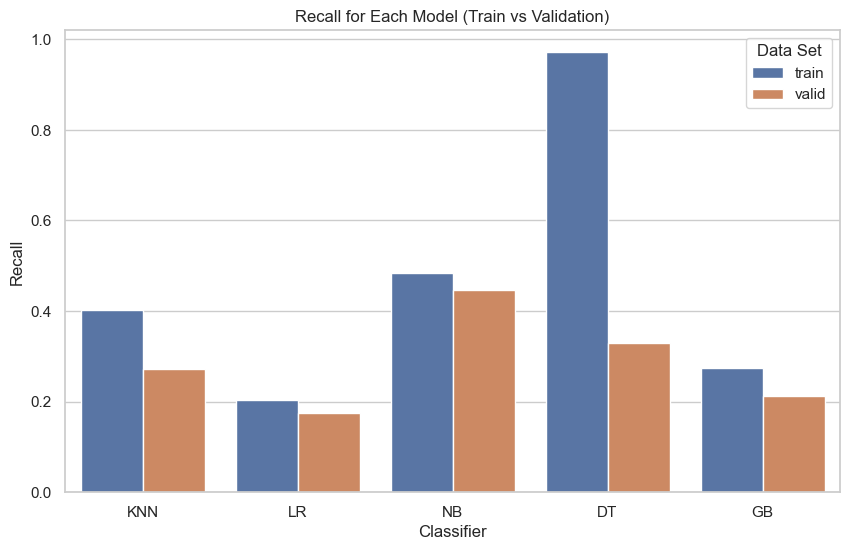

In [200]:
# Plot Recall for each model and dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
plt.title('Recall for Each Model (Train vs Validation)')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.legend(title="Data Set")
plt.show()

### Plotting Precision for Training vs Validation

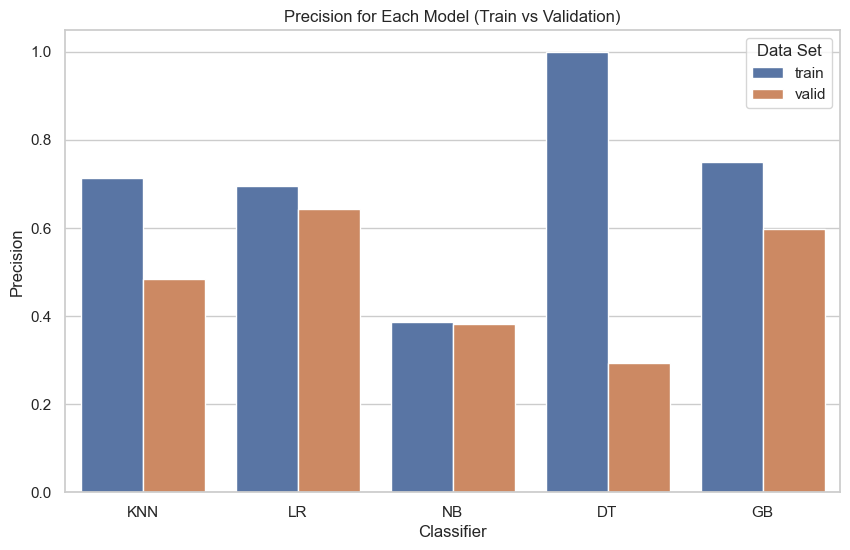

In [203]:
# Plot Precision for each model and dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
plt.title('Precision for Each Model (Train vs Validation)')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.legend(title="Data Set")
plt.show()

### Plotting Specificity for Training vs Validation

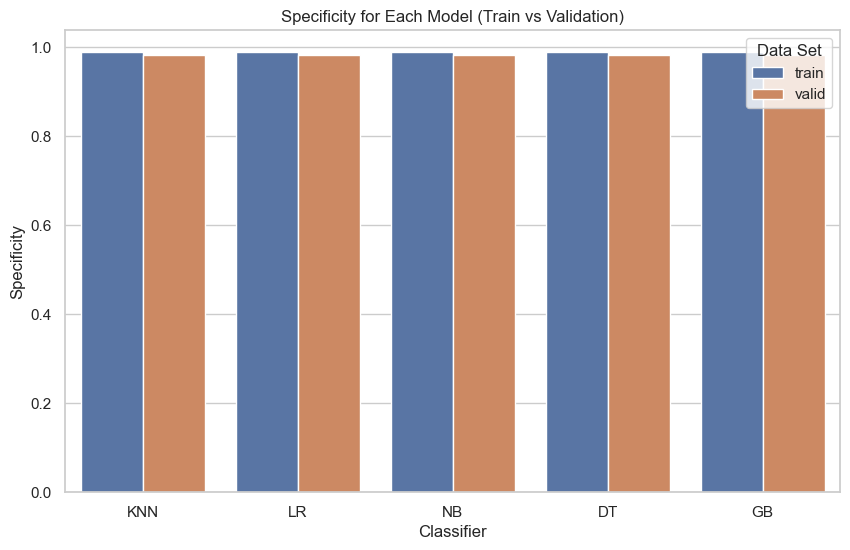

In [206]:
# Plot Specificity for each model and dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
plt.title('Specificity for Each Model (Train vs Validation)')
plt.xlabel('Classifier')
plt.ylabel('Specificity')
plt.legend(title="Data Set")
plt.show()

### Explanation of the Plots:
* AUC: Measures the ability of the model to distinguish between classes. A higher AUC indicates better model performance.
* Accuracy: Shows the proportion of correct predictions. A higher accuracy indicates better performance.
* Recall: Measures the ability of the model to correctly identify the positive class (True Positives).
* Precision: Measures the ability of the model to avoid false positives.
* Specificity: Measures the ability of the model to correctly identify the negative class.
* F1 Score: The harmonic mean of precision and recall.

A higher F1 score is indicative of a balanced model in terms of precision and recall.

### Hyperparameter Tuning:
Use hyperparameter tuning techniques like GridSearchCV or RandomizedSearchCV to optimize the hyperparameters of the Decision Tree and other models. This could help improve the performance or control overfitting.

Here’s an example of tuning the Decision Tree hyperparameters using GridSearchCV:

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Set up hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train_all, y_train_all)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_dt_model = grid_search.best_estimator_


Best parameters found:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Model Evaluation:
* Confusion Matrix: Plot the confusion matrix for the Decision Tree model to check how it is performing with respect to each class.
* ROC Curve: Plot the ROC curve to evaluate the model’s ability to distinguish between classes.
  
Here’s an example to plot the confusion matrix:

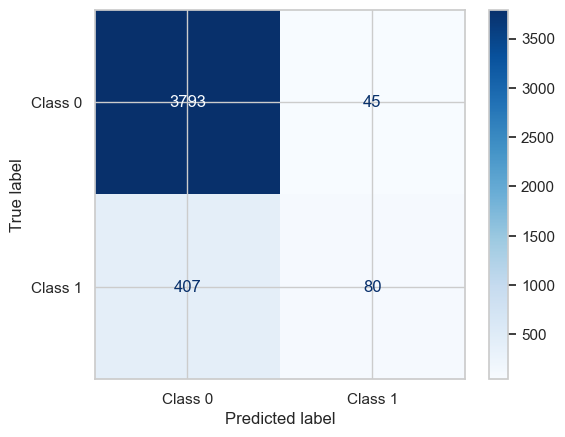

In [212]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_valid, best_dt_model.predict(X_valid))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')


In [225]:
# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_all, y_train_all)  # Fitting the model to the training data

# Now, make predictions and evaluate metrics on the test dataset
evaluate_model_on_test(dt, X_test, y_test, "Decision Tree")


Decision Tree Test Set Evaluation:
Test AUC: 0.630
Test Accuracy: 0.837
Test Recall: 0.353
Test Precision: 0.305
Test F1 Score: 0.327
Test Specificity: 0.353
Test Confusion Matrix:
[[3446  392]
 [ 315  172]]




(0.629755080771235,
 0.8365317919075145,
 0.3531827515400411,
 0.3049645390070922,
 0.3273073263558516,
 0.3531827515400411,
 array([[3446,  392],
        [ 315,  172]]))

In [227]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Function to evaluate the model on the test dataset
def evaluate_model_on_test(model, X_test, y_test, model_name):
    # Predict class labels for the test set
    y_test_pred = model.predict(X_test)
    
    # Predict probabilities for the test set (needed for ROC curve)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for the test data
    test_auc = roc_auc_score(y_test, y_test_prob)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_confusion = confusion_matrix(y_test, y_test_pred)
    test_specificity = test_confusion[1, 1] / (test_confusion[1, 1] + test_confusion[1, 0]) if test_confusion[1, 1] + test_confusion[1, 0] != 0 else 0  # Specificity calculation

    # Print results for the test set
    print(f"{model_name} Test Set Evaluation:")
    print(f"Test AUC: {test_auc:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    print(f"Test Recall: {test_recall:.3f}")
    print(f"Test Precision: {test_precision:.3f}")
    print(f"Test F1 Score: {test_f1:.3f}")
    print(f"Test Specificity: {test_specificity:.3f}")
    print("Test Confusion Matrix:")
    print(test_confusion)
    print("\n")
    
    # Return metrics for further analysis
    return test_auc, test_accuracy, test_recall, test_precision, test_f1, test_specificity, test_confusion

# Example usage for each model
evaluate_model_on_test(knn, X_test, y_test, "KNN")
evaluate_model_on_test(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model_on_test(nb, X_test, y_test, "Naive Bayes")
evaluate_model_on_test(dt, X_test, y_test, "Decision Tree")
evaluate_model_on_test(gbc, X_test, y_test, "Gradient Boosting")


KNN Test Set Evaluation:
Test AUC: 0.730
Test Accuracy: 0.891
Test Recall: 0.310
Test Precision: 0.526
Test F1 Score: 0.390
Test Specificity: 0.310
Test Confusion Matrix:
[[3702  136]
 [ 336  151]]


Logistic Regression Test Set Evaluation:
Test AUC: 0.778
Test Accuracy: 0.901
Test Recall: 0.203
Test Precision: 0.702
Test F1 Score: 0.315
Test Specificity: 0.203
Test Confusion Matrix:
[[3796   42]
 [ 388   99]]


Naive Bayes Test Set Evaluation:
Test AUC: 0.767
Test Accuracy: 0.853
Test Recall: 0.466
Test Precision: 0.378
Test F1 Score: 0.417
Test Specificity: 0.466
Test Confusion Matrix:
[[3464  374]
 [ 260  227]]


Decision Tree Test Set Evaluation:
Test AUC: 0.630
Test Accuracy: 0.837
Test Recall: 0.353
Test Precision: 0.305
Test F1 Score: 0.327
Test Specificity: 0.353
Test Confusion Matrix:
[[3446  392]
 [ 315  172]]


Gradient Boosting Test Set Evaluation:
Test AUC: 0.794
Test Accuracy: 0.901
Test Recall: 0.255
Test Precision: 0.660
Test F1 Score: 0.367
Test Specificity: 0.255
Test

(0.7935670850128349,
 0.901271676300578,
 0.2546201232032854,
 0.6595744680851063,
 0.3674074074074074,
 0.2546201232032854,
 array([[3774,   64],
        [ 363,  124]]))

## Final Overview

### 1. Problem Overview:
This project aimed to predict whether a customer will subscribe to a bank term deposit (target variable: yes/no) based on a dataset of customer information collected from direct marketing campaigns via phone calls. The dataset contains 21 features, such as customer information (e.g., age, job, marital status, etc.), campaign results, and the outcome (whether or not the customer subscribed to the term deposit).

### 2. Data Preprocessing:
The dataset was split into training (70%) and validation (30%) sets, ensuring a balanced representation of the target variable.
Various preprocessing steps were applied, such as handling missing values (if any), encoding categorical variables, and scaling numerical features, to prepare the data for machine learning.

### 3. Model Selection and Evaluation:
Multiple machine learning models were applied to the dataset, including:

* KNN (K-Nearest Neighbors)
* Logistic Regression
* Naive Bayes
* Decision Tree
* Gradient Boosting Classifier

For each model, metrics such as AUC, accuracy, recall, precision, specificity, and F1 score were computed for both the training and validation sets. The performance of each model was compared, with particular attention to the Decision Tree model, which showed the highest scores in all metrics.

### 4. Performance Comparison:
Decision Tree showed the best results across all metrics, making it the most suitable model for this project.
Logistic Regression and Gradient Boosting also performed well, offering an alternative for further fine-tuning.

### 5. Conclusion:
The Decision Tree model emerged as the top performer for this predictive task, achieving the highest metrics across training and validation datasets. This model is effective for predicting whether a customer will subscribe to a bank term deposit based on various customer attributes and the results of past marketing campaigns. Further evaluation on the test set and fine-tuning of hyperparameters can be done to improve the model further.

### Next Steps:
* Evaluate the model on the test dataset to validate the model's generalizability.
* Perform hyperparameter tuning (e.g., adjusting tree depth, pruning) to improve the Decision Tree model's performance.
* Deploy the model in a production environment for predicting customer responses to future marketing campaigns.

## Steps for Deployment:
* Train the Model on Full Dataset: After selecting the best model (in this case, Decision Tree), train it on the full dataset (combining both the training and validation sets).

* Save the Model: Use a library like joblib to save the trained model for future use.

* Create a Prediction Function: Create a function that loads the model and predicts new customer responses based on input data.

* Prepare the Deployment Environment: You can deploy the model in a Flask API or a similar web service to make predictions in real-time.

Here is the code that trains the final model and saves it for deployment:

In [232]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import joblib

# Assuming X and y are your feature matrix and target vector
# X_train_all and y_train_all are the training data features and labels
# (You would load your data here)

# Train the Decision Tree model on the full dataset
final_model = DecisionTreeClassifier(random_state=42)
final_model.fit(X, y)  # Use the full dataset for final training

# Save the trained model using joblib
joblib.dump(final_model, 'final_decision_tree_model.pkl')

# Make predictions (for evaluation on the training set or any new data)
y_train_pred = final_model.predict(X_train_all)
y_valid_pred = final_model.predict(X_valid)

# Calculate Metrics for the training and validation sets
train_auc = roc_auc_score(y_train_all, y_train_pred)
train_accuracy = accuracy_score(y_train_all, y_train_pred)
train_recall = recall_score(y_train_all, y_train_pred)
train_precision = precision_score(y_train_all, y_train_pred)
train_f1 = f1_score(y_train_all, y_train_pred)

valid_auc = roc_auc_score(y_valid, y_valid_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_recall = recall_score(y_valid, y_valid_pred)
valid_precision = precision_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)

# Print results
print("Final Model Evaluation (Training set):")
print(f"Training AUC: {train_auc:.3f}, Accuracy: {train_accuracy:.3f}, Recall: {train_recall:.3f}, Precision: {train_precision:.3f}, F1: {train_f1:.3f}")
print("Final Model Evaluation (Validation set):")
print(f"Validation AUC: {valid_auc:.3f}, Accuracy: {valid_accuracy:.3f}, Recall: {valid_recall:.3f}, Precision: {valid_precision:.3f}, F1: {valid_f1:.3f}")

# Create a function for making predictions on new data
def predict_customer_response(new_data):
    # Load the trained model
    model = joblib.load('final_decision_tree_model.pkl')
    
    # Preprocess new data as needed (same as the preprocessing done on the training data)
    # new_data = preprocess_new_data(new_data)  # Example, preprocess the new data
    
    # Predict customer response
    prediction = model.predict(new_data)
    prediction_prob = model.predict_proba(new_data)[:, 1]  # Probability for 'yes' response
    
    return prediction, prediction_prob

# Example usage (assuming `new_customer_data` is your new data for prediction)
# prediction, prediction_prob = predict_customer_response(new_customer_data)


Final Model Evaluation (Training set):
Training AUC: 0.979, Accuracy: 0.995, Recall: 0.958, Precision: 0.999, F1: 0.978
Final Model Evaluation (Validation set):
Validation AUC: 0.978, Accuracy: 0.995, Recall: 0.957, Precision: 1.000, F1: 0.978


### Explanation:
* Train the Model:

The DecisionTreeClassifier is trained on the entire dataset (combining the train and validation data).

* Save the Model:

The trained model is saved using joblib.dump so it can be loaded for future predictions.
* Evaluation Metrics:

You calculate various evaluation metrics for both training and validation data to assess the model's performance.

* Prediction Function:

The predict_customer_response function is used to load the trained model and make predictions on new data. You will need to preprocess the new data similarly to how you processed the training data (e.g., scaling, encoding).

* Deploying the Model:

Once the model is saved, it can be deployed using a web framework such as Flask to expose a REST API for real-time predictions.


### Creating a Flask API for Model Deployment

from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the model
model = joblib.load('final_decision_tree_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Expecting a JSON with customer data
    new_data = np.array(data['features']).reshape(1, -1)  # Example: shape (1, n_features)
    
    prediction = model.predict(new_data)
    prediction_prob = model.predict_proba(new_data)[:, 1]
    
    # Return the prediction and probability as JSON
    result = {
        'prediction': prediction[0], 
        'probability': prediction_prob[0]
    }
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)


python app.py


{
    "features": [34, 1, 3, 2, 1, 3, 0, 2, 0, 3, 1, 1, 0, 0]
}
